<a href="https://colab.research.google.com/github/ssuxmin/tmp/blob/main/chap_2_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%98_%EC%88%98%ED%95%99%EC%A0%81_%EA%B5%AC%EC%84%B1_%EC%9A%94%EC%86%8C(%EC%BD%94%EB%93%9C_%EC%97%B0%EC%8A%B5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.1 신경망과의 첫 만남

**(코드 2-1) 케라스에서 Mnist 데이터셋 적재**


In [313]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()   
#training set(훈련 세트), test set(테스트 세트)

In [314]:
train_images.shape

(60000, 28, 28)

In [315]:
len(train_labels)

60000

In [316]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [317]:
test_images.shape

(10000, 28, 28)

In [318]:
len(test_labels)

10000

In [319]:
len(train_images)

60000

In [320]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**(코드 2-2) 신경망 구조**

In [321]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# output이 512 였으면 512개가 그다음의 layer의 input이 된다.

In [322]:
model

**(코드 2-3) 컴파일 단계**

In [323]:
model.compile(optimizer="rmsprop",                        # 모델이 옳은 방향으로 학습될 수 있도록 도움을 줌
              loss="sparse_categorical_crossentropy",    # 모델 업데이트
              metrics=["accuracy"])

**(코드2-4) 이미지 데이터 준비하기**

In [324]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32")/255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32")/255

**(코드2-5) 모델 훈련하기**

In [325]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 7s 14ms/step - loss: 0.2645 - accuracy: 0.9240
Epoch 2/5
469/469 [==============================] - 6s 13ms/step - loss: 0.1086 - accuracy: 0.9680
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0712 - accuracy: 0.9785
Epoch 4/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0520 - accuracy: 0.9845
Epoch 5/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0382 - accuracy: 0.9880


**(코드2-6) 모델을 사용하여 예측 만들기**

In [326]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 65ms/step


array([5.0058605e-07, 2.1445148e-08, 2.2610420e-05, 4.6972415e-04,
       3.7716764e-11, 2.1602867e-07, 2.9601682e-11, 9.9950129e-01,
       7.5658926e-07, 4.8824327e-06], dtype=float32)

In [327]:
predictions

array([[5.00586054e-07, 2.14451479e-08, 2.26104203e-05, 4.69724153e-04,
        3.77167637e-11, 2.16028667e-07, 2.96016822e-11, 9.99501288e-01,
        7.56589259e-07, 4.88243268e-06],
       [2.16579480e-07, 4.82739233e-06, 9.99971449e-01, 1.61421831e-05,
        8.16168151e-13, 1.02480238e-08, 3.11975441e-08, 6.43767244e-12,
        7.29392832e-06, 2.32785536e-12],
       [3.64513653e-06, 9.98424768e-01, 3.15472018e-04, 1.36060607e-05,
        2.87134153e-05, 7.78598314e-06, 4.34977483e-06, 7.67339137e-04,
        4.32150118e-04, 2.32977686e-06],
       [9.99966204e-01, 5.69037706e-10, 2.06626028e-05, 5.17895842e-08,
        2.42327669e-08, 5.68591219e-08, 5.97226574e-07, 1.06335492e-05,
        2.59399990e-09, 1.77348056e-06],
       [5.36335733e-07, 1.54291679e-09, 1.65620759e-06, 1.82586870e-08,
        9.99252200e-01, 1.41911043e-08, 1.27381486e-06, 1.51495979e-05,
        4.35652936e-07, 7.28730694e-04],
       [4.04223002e-08, 9.99595225e-01, 2.04313324e-06, 7.72803673e-07,
   

In [328]:
predictions[1]

array([2.1657948e-07, 4.8273923e-06, 9.9997145e-01, 1.6142183e-05,
       8.1616815e-13, 1.0248024e-08, 3.1197544e-08, 6.4376724e-12,
       7.2939283e-06, 2.3278554e-12], dtype=float32)

In [329]:
predictions[0].argmax()

7

In [330]:
predictions[0][7]

0.9995013

In [331]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [332]:
test_labels[0]

7

**(코드2-7) 새로운 데이터에서 모델 평가**

In [333]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"테스트 정확도: {test_acc}")

313/313 [==============================] - 1s 4ms/step - loss: 0.0740 - accuracy: 0.9767
테스트 정확도: 0.9767000079154968


# 2.2 신경망을 위한 데이터 표현

###스칼라(랭크-0 텐서)

In [334]:
import numpy as np
x= np.array(12)
x

array(12)

In [335]:
x.ndim

0

### 벡터(랭크-1 텐서)

In [336]:
x= np.array([12,3,6,14,7])    # 5개의 원소 = 5차원 벡터

# 5D 벡터 : 하나의 축을 따라 5개의 차원을 가진 것
# 5D 텐서 : 5개의 축을 가진 것

In [337]:
x

array([12,  3,  6, 14,  7])

In [338]:
x.ndim

1

### 행렬(랭크-2 텐서)

In [339]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x

array([[ 5, 78,  2, 34,  0],
       [ 6, 79,  3, 35,  1],
       [ 7, 80,  4, 36,  2]])

In [340]:
x.ndim

2

### 랭크-3 텐서 와 더 높은 랭크의 텐서

In [341]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x

array([[[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]]])

In [342]:
x.ndim

3

### 핵심 속성

In [343]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [344]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [345]:
train_images.ndim    # 축의 갯수

3

In [346]:
train_images.shape # 배열의 크기

(60000, 28, 28)

In [347]:
train_images.dtype  # 데이터 타입

dtype('uint8')

**(코드 2-8)다섯 번째 이미지 출력하기**

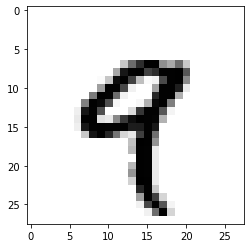

In [348]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

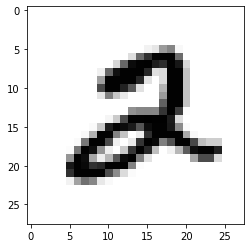

In [349]:
import matplotlib.pyplot as plt
digit = train_images[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

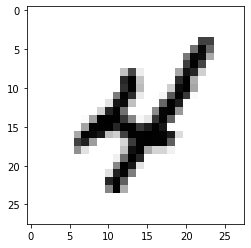

In [350]:
import matplotlib.pyplot as plt
digit = train_images[9]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [351]:
train_labels[4]

9

In [352]:
train_labels[5]

2

In [353]:
train_labels[9]

4

### 2.2.6 넘파이로 텐서 조작하기

In [354]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [355]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [356]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [357]:
my_slice = train_images[:, 14:, 14:]
my_slice.shape

(60000, 14, 14)

In [358]:
my_slice =train_images[:, 7:-7, 7:-7]
my_slice.shape

(60000, 14, 14)

### 2.2.7 배치 데이터

In [359]:
batch = train_images[:128]
batch.shape

(128, 28, 28)

In [360]:
batch = train_images[128:256]
batch.shape

(128, 28, 28)

In [361]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]
batch.shape

(128, 28, 28)

### 2.2.8 텐서의 실제 사례 
### 2.2.9 벡터 데이터
### 2.2.10 시계열 데이터 또는 시퀀스 데이터
### 2.2.11 이미지 데이터
### 2.2.12 비디오 데이터

# 2.3 신경마의 톱니바퀴 : 텐서 연산


### 2.3.1 원소별 연산

In [362]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [363]:
x.ndim

3

In [364]:
x.shape

(3, 3, 5)

In [365]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [366]:
x.ndim

3

In [367]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("걸린 시간: {0:.2f} s".format(time.time() - t0))

걸린 시간: 0.01 s


In [368]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("걸린 시간: {0:.2f} s".format(time.time() - t0))

걸린 시간: 2.20 s
